In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

In [9]:
plt.rc('font', family='NanumBarunGothic')  # 폰트 설정
font_location = 'C:/Windows/Fonts/MALGUNSL.TTF' # for windows
font_name = fm.FontProperties(fname=font_location).get_name()
plt.rc('font', family=font_name)

In [10]:
%matplotlib inline
# 그래프 설정
import matplotlib as mpl
mpl.rc('axes',labelsize = 16)
mpl.rc('xtick',labelsize = 12)
mpl.rc('ytick',labelsize = 12)

# 데이터 불러오기

In [11]:
df = pd.read_csv('C:/Users/yoon9/PycharmProjects/Sejong_Project/AI Class/Data/Movie Data/train(2).csv') #파일 불러오기
df2 = pd.read_csv('C:/Users/yoon9/PycharmProjects/Sejong_Project/AI Class/Data/Movie Data/test(2).csv')

In [12]:
df = pd.concat([df,df2],axis=0) # 데이터 전처리 전 test 셋 합치기

In [13]:
df # 데이터 프레임 5줄만 확인

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398.0
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501.0
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083.0
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866.0
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387.0
...,...,...,...,...,...,...,...,...,...,...,...,...
238,해에게서 소년에게,디씨드,드라마,2015-11-19,78,15세 관람가,안슬기,2590.00,1,4,4,NaN
239,울보 권투부,인디스토리,다큐멘터리,2015-10-29,86,12세 관람가,이일하,NaN,0,18,2,NaN
240,어떤살인,(주)컨텐츠온미디어,느와르,2015-10-28,107,청소년 관람불가,안용훈,NaN,0,224,4,NaN
241,말하지 못한 비밀,(주)씨타마운틴픽쳐스,드라마,2015-10-22,102,청소년 관람불가,송동윤,50699.00,1,68,7,NaN


In [14]:
df.info() # 데이터 프레임 type 과 Row 개수 확인

<class 'pandas.core.frame.DataFrame'>
Int64Index: 843 entries, 0 to 242
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           843 non-null    object 
 1   distributor     843 non-null    object 
 2   genre           843 non-null    object 
 3   release_time    843 non-null    object 
 4   time            843 non-null    int64  
 5   screening_rat   843 non-null    object 
 6   director        843 non-null    object 
 7   dir_prev_bfnum  377 non-null    float64
 8   dir_prev_num    843 non-null    int64  
 9   num_staff       843 non-null    int64  
 10  num_actor       843 non-null    int64  
 11  box_off_num     600 non-null    float64
dtypes: float64(2), int64(4), object(6)
memory usage: 85.6+ KB


title : 영화의 제목
distributor : 배급사
genre : 장르
release_time : 개봉일
time : 상영시간
screening_rat : 상영 등급
director : 감독이름
dir_prev_bfnum : 감독의 이전 작품의 관객 수 평균
dir_prev_num : 감독이 만든 이전 작품의 개수
num_staff : 스텝 수
num_actor : 주연배우 수

## 결측치 처리

In [15]:
df.isnull().sum() # 데이터 프레임 결측치 개수 확인

# 결과 : dir_prev_num 에서 600개 중 50 % 이상에 결측치 확인

title               0
distributor         0
genre               0
release_time        0
time                0
screening_rat       0
director            0
dir_prev_bfnum    466
dir_prev_num        0
num_staff           0
num_actor           0
box_off_num       243
dtype: int64

In [16]:
df[df['dir_prev_bfnum'].isnull()]  ## 결측치가 있는 행 확인

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398.0
6,길위에서,백두대간,다큐멘터리,2013-05-23,104,전체 관람가,이창재,NaN,0,32,5,53526.0
8,"1789, 바스티유의 연인들",유니버설픽쳐스인터내셔널코리아,뮤지컬,2014-09-18,129,전체 관람가,정성복,NaN,0,3,5,4778.0
9,청춘그루브,(주)두타연,드라마,2012-03-15,94,15세 관람가,변성현,NaN,0,138,3,868.0
10,AV 아이돌,(주) 케이알씨지,멜로/로맨스,2015-07-27,89,청소년 관람불가,조조 히데오,NaN,0,0,4,745.0
...,...,...,...,...,...,...,...,...,...,...,...,...
235,타이밍,(주)스톰픽쳐스코리아,애니메이션,2015-12-10,100,15세 관람가,민경조,NaN,0,56,1,NaN
237,어떤이의 꿈,하준사,드라마,2015-11-26,72,12세 관람가,조성규,NaN,0,29,3,NaN
239,울보 권투부,인디스토리,다큐멘터리,2015-10-29,86,12세 관람가,이일하,NaN,0,18,2,NaN
240,어떤살인,(주)컨텐츠온미디어,느와르,2015-10-28,107,청소년 관람불가,안용훈,NaN,0,224,4,NaN


In [17]:
df[~df['dir_prev_bfnum'].isnull()]  ## 결측치가 없는 행 확인

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501.0
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083.0
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866.0
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387.0
5,강철대오 : 구국의 철가방,롯데엔터테인먼트,코미디,2012-10-25,113,15세 관람가,육상효,837969.00,2,262,4,233211.0
...,...,...,...,...,...,...,...,...,...,...,...,...
232,마돈나,리틀빅픽처스,드라마,2015-07-02,120,청소년 관람불가,신수원,771699.00,1,126,4,NaN
233,"나의 아들, 나의 어머니",인디플러그,다큐멘터리,2015-12-17,70,전체 관람가,안재민,3568.00,3,1,2,NaN
236,타투,(주)다세포클럽,공포,2015-12-10,92,청소년 관람불가,이서,2099029.00,2,162,4,NaN
238,해에게서 소년에게,디씨드,드라마,2015-11-19,78,15세 관람가,안슬기,2590.00,1,4,4,NaN


분석 결과 이전 작품의 수가 0 인 영화에서 dir_prev_bfnum 이 결측치인 것이 확인
왜냐하면 이전 작품이 없으니 이전 작품의 관객 수가 0이다.
따라서 결측치를 0으로 대체 (아래의 코드에서 진행)

## 변수 별 데이터 전처리

In [18]:
df.columns

Index(['title', 'distributor', 'genre', 'release_time', 'time',
       'screening_rat', 'director', 'dir_prev_bfnum', 'dir_prev_num',
       'num_staff', 'num_actor', 'box_off_num'],
      dtype='object')

### distributor(제작사) 전처리

In [19]:
df_distributor = df['distributor'].value_counts() #제작사가 제작한 영화의 수 데이터 프레임 제작

In [20]:
df_distributor = df_distributor.reset_index() # 인덱스 초기화

In [21]:
df_distributor

## 분석 결과 대부분의 제작사가 1번씩 등장했다.
# 효과적인 학습을 위해 제작사가 제작한 영화사에 따라서 등급을 부여
# 초대형제작사 : 0 , 대형 제작사 : 1 , 중형제작사 : 2 , 소형제작사 : 3

,index,distributor
0,CJ 엔터테인먼트,85
1,롯데엔터테인먼트,76
2,(주)마운틴픽쳐스,43
3,(주)쇼박스,38
4,인디스토리,37
...,...,...
199,찬란,1
200,(주)디씨드,1
201,(주)패뷸러스,1
202,영화사 조아,1


<AxesSubplot:xlabel='index', ylabel='distributor'>

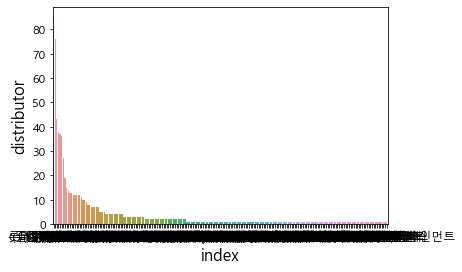

In [22]:
sns.barplot(data = df_distributor, x = df_distributor['index'], y = df_distributor['distributor']) # 전체 시각화를 Barplot 이용하여 시각화

In [23]:
df_distributor[df_distributor['distributor'] != 1].describe()  # 제작한 영화가 1개 이상인 곳을 확인

# 초대형과 대형을 나누는 기준 : 제작 영화가 20개를 넘는 제작사는 대형 제작사
# 대형과 중형을 나누는 기준 : 평균값인 7.43 을 넘는 제작사는 대형 제작사

,distributor
count,81.000000
mean,8.888889
std,14.316075
min,2.000000
25%,2.000000
50%,4.000000
75%,9.000000
max,85.000000


In [24]:
def distributor_def(cnt): #등급을 나누는 함수
    if int(cnt) > 20:
       return 0
    elif (int(cnt) > 7 and int(cnt) < 20):
        return 1
    elif (int(cnt) > 2 and int(cnt) < 8):
        return 2
    else :
        return 3

df_distributor['distributor_grade'] = df_distributor['distributor'].apply(lambda x : distributor_def(x)) # 제작사 등급 나누기

In [25]:
df_distributor

,index,distributor,distributor_grade
0,CJ 엔터테인먼트,85,0
1,롯데엔터테인먼트,76,0
2,(주)마운틴픽쳐스,43,0
3,(주)쇼박스,38,0
4,인디스토리,37,0
...,...,...,...
199,찬란,1,3
200,(주)디씨드,1,3
201,(주)패뷸러스,1,3
202,영화사 조아,1,3


In [26]:
# 각 등급에 따른 제작사 리스트 저장

grade_0 = df_distributor[df_distributor['distributor_grade'] == 0]['index'].tolist()
grade_1 = df_distributor[df_distributor['distributor_grade'] == 1]['index'].tolist()
grade_2 = df_distributor[df_distributor['distributor_grade'] == 2]['index'].tolist()
grade_3 = df_distributor[df_distributor['distributor_grade'] == 3]['index'].tolist()

In [27]:
def distributor_grade_def(name):
    if name in grade_0:
       return 0
    elif name in grade_1:
        return 1
    elif name in grade_2:
        return 2
    else :
        return 3

df['distributor'] = df['distributor'].apply(lambda x : distributor_grade_def(x))

In [28]:
df

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,0,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398.0
1,내부자들,0,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501.0
2,은밀하게 위대하게,0,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083.0
3,나는 공무원이다,0,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866.0
4,불량남녀,2,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387.0
...,...,...,...,...,...,...,...,...,...,...,...,...
238,해에게서 소년에게,3,드라마,2015-11-19,78,15세 관람가,안슬기,2590.00,1,4,4,NaN
239,울보 권투부,0,다큐멘터리,2015-10-29,86,12세 관람가,이일하,NaN,0,18,2,NaN
240,어떤살인,3,느와르,2015-10-28,107,청소년 관람불가,안용훈,NaN,0,224,4,NaN
241,말하지 못한 비밀,3,드라마,2015-10-22,102,청소년 관람불가,송동윤,50699.00,1,68,7,NaN


### Genre

In [29]:
df['genre'].value_counts() # 장르별 개수 확인

# 12개여서 나중에 One-hot-encoding

드라마       299
다큐멘터리     126
멜로/로맨스    117
코미디        76
공포         61
액션         49
느와르        39
애니메이션      29
미스터리       24
SF         14
뮤지컬         6
서스펜스        3
Name: genre, dtype: int64

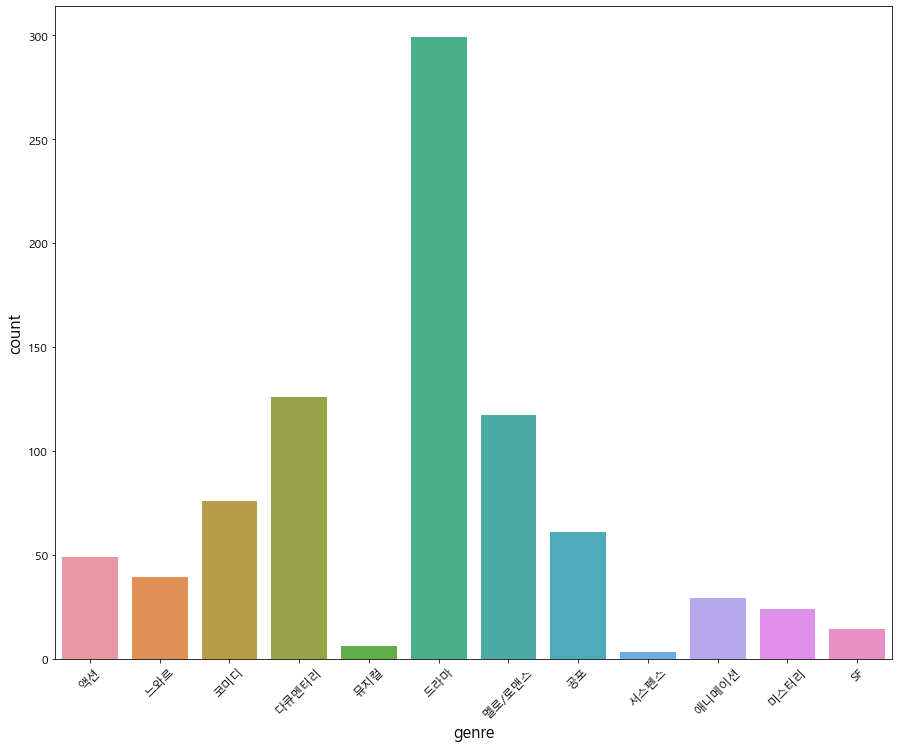

In [30]:
plt.figure(figsize= (15,12)) # 시각화
sns.countplot(data = df, x = df['genre'])
plt.xticks(rotation = 45)
plt.show()

### Release_time

In [31]:
df['release_time']  = pd.to_datetime(df['release_time']) # 데이터 type 을 시간을 나타내는 type 인 datetime 으로 변경

In [32]:
# 날짜를 다 사용하지 않고 개봉한 월 까지만 사용

df['release_time'] = df['release_time'].dt.strftime('%m')

In [33]:
df['release_time'] = df['release_time'].astype(int)

### screening_rat

In [34]:
df['screening_rat'].value_counts()  # 총 4개여서 나중에 One-hot-incoding 실시

청소년 관람불가    297
15세 관람가     275
12세 관람가     142
전체 관람가      129
Name: screening_rat, dtype: int64

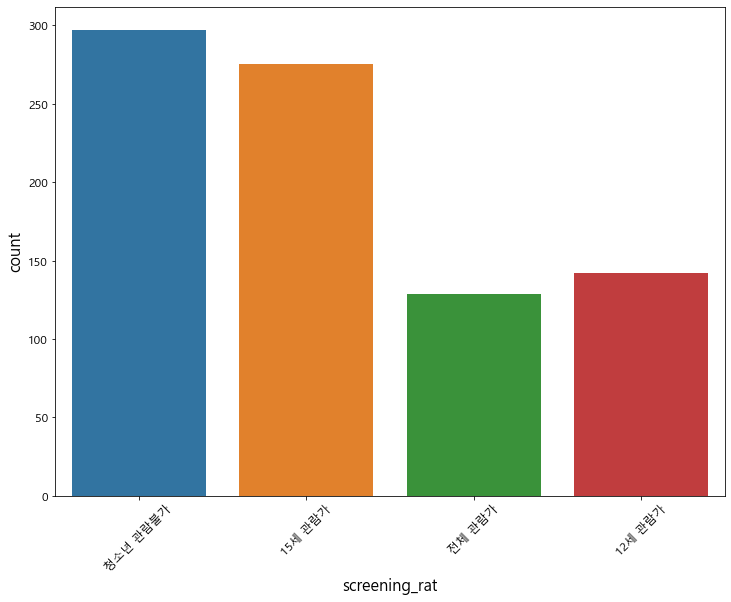

In [35]:
plt.figure(figsize= (12,9))
sns.countplot(data = df, x = df['screening_rat'])
plt.xticks(rotation = 45)
plt.show()

### Director

In [36]:
df['director'].value_counts() # 감독의 경우 너무 많아서 이 피쳐는 사용하지 않고 'dir_prev_bfnum', 'dir_prev_num' 을 사용해서 감독을 학습

홍상수    8
조성규    6
전규환    6
우민호    4
곽경택    4
      ..
이홍재    1
주경중    1
김학순    1
고석진    1
김명준    1
Name: director, Length: 614, dtype: int64

### dir_prev_bfnum , dir_prev_num

In [37]:
df[['title','dir_prev_num','dir_prev_bfnum']]

,title,dir_prev_num,dir_prev_bfnum
0,개들의 전쟁,0,NaN
1,내부자들,2,1161602.50
2,은밀하게 위대하게,4,220775.25
3,나는 공무원이다,2,23894.00
4,불량남녀,1,1.00
...,...,...,...
238,해에게서 소년에게,1,2590.00
239,울보 권투부,0,NaN
240,어떤살인,0,NaN
241,말하지 못한 비밀,1,50699.00


결측치가 있기 때문에 결측치 처리

결측치의 경우 감독의 이전 작품이 0일 경우 발생하기 때문에 이전 작품의 관객 수인 결측치를 0으로 처리

In [38]:
df.fillna(0,inplace=True)

In [39]:
df.isnull().count() # 결측치 처리 확인

title             843
distributor       843
genre             843
release_time      843
time              843
screening_rat     843
director          843
dir_prev_bfnum    843
dir_prev_num      843
num_staff         843
num_actor         843
box_off_num       843
dtype: int64

In [40]:
df.columns

Index(['title', 'distributor', 'genre', 'release_time', 'time',
       'screening_rat', 'director', 'dir_prev_bfnum', 'dir_prev_num',
       'num_staff', 'num_actor', 'box_off_num'],
      dtype='object')

### num_staff , num_actor 은 숫자형이기 때문에 그대로 사용

## 이상치 확인

<AxesSubplot:>

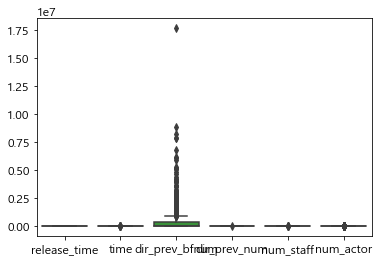

In [41]:
sns.boxplot(data = df[['release_time','time','dir_prev_bfnum', 'dir_prev_num','num_staff', 'num_actor']]) # 결과 dir_prev_bfnum 을 제와하고 이상치가 없는 것으로 확인

## One-Hot-encoding, Scalering

In [42]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler


In [43]:
# One-hot-encoding, 스케일링 전 데이터 분리
# 학습에 사용하지 않는 피쳐, X, y 로 구분
X = df.drop(columns=['title','director','box_off_num'])
y = df['box_off_num']
X

,distributor,genre,release_time,time,screening_rat,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
0,0,액션,11,96,청소년 관람불가,0.00,0,91,2
1,0,느와르,11,130,청소년 관람불가,1161602.50,2,387,3
2,0,액션,6,123,15세 관람가,220775.25,4,343,4
3,0,코미디,7,101,전체 관람가,23894.00,2,20,6
4,2,코미디,11,108,15세 관람가,1.00,1,251,2
...,...,...,...,...,...,...,...,...,...
238,3,드라마,11,78,15세 관람가,2590.00,1,4,4
239,0,다큐멘터리,10,86,12세 관람가,0.00,0,18,2
240,3,느와르,10,107,청소년 관람불가,0.00,0,224,4
241,3,드라마,10,102,청소년 관람불가,50699.00,1,68,7


In [44]:
## 타입 확인 후 수치형 범주형 분리
X.dtypes

distributor         int64
genre              object
release_time        int32
time                int64
screening_rat      object
dir_prev_bfnum    float64
dir_prev_num        int64
num_staff           int64
num_actor           int64
dtype: object

In [45]:
# release time, time, dir_prev_num, dir_prev_bfnum, num_staff, num_actor 연속형 수치형 변수
# distributor, genre, screening rat 범주형 변수

number_attribs = X.drop(columns=['distributor','genre','screening_rat']) # 스케일링을 진행할 수치형 변수
cat_ordi_attribs = X[['distributor']]  # 순서가 있는 범주형
cat_one_hot_attribs = X[['genre','screening_rat']] # 순서가 없는 범주형

In [46]:
# 수치형 변수 스케일링
scaler = StandardScaler()
X_scale = scaler.fit_transform(number_attribs)

In [47]:
X_scale = pd.DataFrame(X_scale, columns=number_attribs.columns) # 스케일링 데이터 프레임화

In [48]:
X_scale

,release_time,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
0,1.184476,-0.108917,-0.371783,-0.732566,-0.379286,-0.696722
1,1.184476,0.388896,0.588730,0.952435,1.417543,-0.272039
2,-0.278333,0.286405,-0.189227,2.637436,1.150446,0.152644
3,0.014229,-0.035709,-0.352025,0.952435,-0.810283,1.002011
4,1.184476,0.066782,-0.371782,0.109935,0.591973,-0.696722
...,...,...,...,...,...,...
838,1.184476,-0.372466,-0.369641,0.109935,-0.907408,0.152644
839,0.891914,-0.255333,-0.371783,-0.732566,-0.822423,-0.696722
840,0.891914,0.052140,-0.371783,-0.732566,0.428073,0.152644
841,0.891914,-0.021068,-0.329861,0.109935,-0.518905,1.426694


In [49]:
# 원핫인코딩 함수 적용
hot1_encoder = OneHotEncoder(sparse=False)
X_1hot = hot1_encoder.fit_transform(cat_one_hot_attribs)
X_1hot

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [50]:
X_1hot = pd.DataFrame(X_1hot, columns=['SF', '공포', '느와르', '다큐멘터리', '드라마', '멜로/로맨스', '뮤지컬', '미스터리', '서스펜스','애니메이션', '액션', '코미디','12세 관람가', '15세 관람가', '전체 관람가', '청소년 관람불가'])
# 데이터 프레임화

In [51]:
X_1hot

,SF,공포,느와르,다큐멘터리,드라마,멜로/로맨스,뮤지컬,미스터리,서스펜스,애니메이션,액션,코미디,12세 관람가,15세 관람가,전체 관람가,청소년 관람불가
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
838,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
839,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
840,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
841,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [52]:
ord_encoder = OrdinalEncoder()
X_ord = ord_encoder.fit_transform(cat_ordi_attribs)
X_ord = pd.DataFrame(X_ord, columns= ['distributor'])  # Ordinal Eocoder 적용

In [53]:
X = pd.concat([X_scale, X_1hot, X_ord], axis = 1)  ## 최종적인 데이터 프레임 합치기

## train test 분리

In [54]:
test = X[600:]
X = X[0:600]
y = y[:600]

In [55]:
test

,release_time,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,SF,공포,느와르,다큐멘터리,...,미스터리,서스펜스,애니메이션,액션,코미디,12세 관람가,15세 관람가,전체 관람가,청소년 관람불가,distributor
600,-1.741142,0.315688,-0.123280,0.952435,0.913702,-0.272039,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0
601,-1.741142,0.139989,-0.088409,2.637436,0.737661,-0.272039,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
602,-1.741142,0.169273,3.106604,1.794936,1.611794,1.426694,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
603,-1.448580,0.183914,0.199878,0.952435,1.545020,-0.696722,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
604,-1.448580,0.096065,-0.345539,0.109935,1.375050,-1.121406,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
838,1.184476,-0.372466,-0.369641,0.109935,-0.907408,0.152644,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0
839,0.891914,-0.255333,-0.371783,-0.732566,-0.822423,-0.696722,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
840,0.891914,0.052140,-0.371783,-0.732566,0.428073,0.152644,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0
841,0.891914,-0.021068,-0.329861,0.109935,-0.518905,1.426694,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0


In [56]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.1, shuffle= 1004)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((540, 23), (60, 23), (540,), (60,))

## 모델 학습

In [57]:
# 모델 import
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [58]:
model = LinearRegression() # 모델 생성

In [59]:
model.fit(X_train,y_train) # 모델 학습

LinearRegression()

In [60]:
Linear_predicted = model.predict(X_test)

In [61]:

print(f'r2 score : {r2_score(y_test, Linear_predicted)}')
print(f'RMSE : {np.sqrt(mean_squared_error(y_test, Linear_predicted))}')
print(f'MAE : {mean_absolute_error(y_test, Linear_predicted)}')

r2 score : 0.05063210699580456
RMSE : 648070.0913035746
MAE : 526388.2036263522


평가결과 R2 score 는 0.299 가 나왔다.
RMSE 를 통해 평가 결과를 보자면 모델이 예측한 결과와 실제 값과의 차이가 보통 1849577 이 나온다는 것을 알 수 있다.

In [62]:
model.coef_ , model.intercept_ # 가중치와 y절편 확인

(array([  45349.92123269, 1243297.89390172,  160765.71449153,
         -75993.71020925,  638457.66545969,   98908.83004166,
         539629.51747601, -359665.7781654 ,  507313.12346437,
         -60644.15717473, -381354.21501535, -285064.64886083,
          89188.73899417, -258639.38683269,   49924.16413484,
         -44597.34478505,  323725.38446943, -119815.39770478,
         100774.47226129,  156359.90847571,  -19857.87497541,
        -237276.50576159, -155179.57975423]),
 1166679.4644830623)

In [63]:
X_train.columns

Index(['release_time', 'time', 'dir_prev_bfnum', 'dir_prev_num', 'num_staff',
       'num_actor', 'SF', '공포', '느와르', '다큐멘터리', '드라마', '멜로/로맨스', '뮤지컬', '미스터리',
       '서스펜스', '애니메이션', '액션', '코미디', '12세 관람가', '15세 관람가', '전체 관람가',
       '청소년 관람불가', 'distributor'],
      dtype='object')

모델 학습 결과로 나온 피쳐 별 가중치
즉 y = a1 * x1 + a2 * x2 + a3 * x3 ... + b 로 보면
y = 49690.08300627 * releas_time +  1107554.98372725 * time +  169183.06302911 * dir_prev_bfnum ... + 1039850.8676761545 와 같은 다중선형회귀 식을 뽑을 수 있다.

C:\Users\yoon9\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\yoon9\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


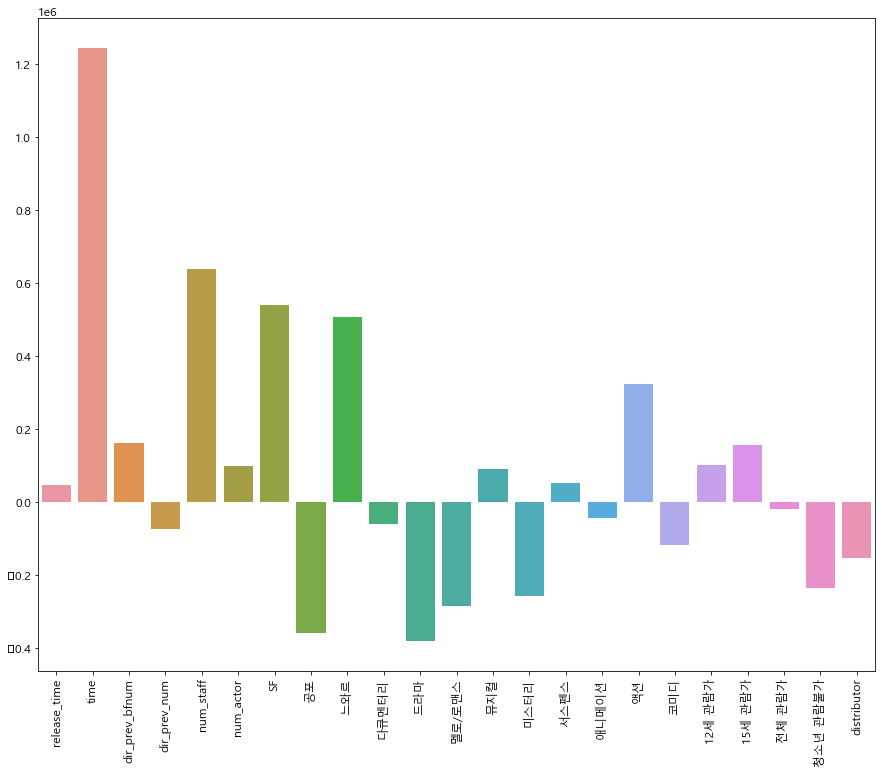

In [64]:
plt.figure(figsize= (15,12))  # 피쳐의 중요도, 가중치 시각화
sns.barplot(x = X_train.columns, y = model.coef_)
plt.xticks(rotation = 90)
plt.show()

모델 성능을 높이기 위해 비슷한 다중 선형 회귀 모델 중에서 feature의 가중치를 조절해주는 모델인 Lasso 모델을 사용

In [65]:
from sklearn.linear_model import Lasso

lasso_model_3 = Lasso(alpha= 3)
lasso_model_3.fit(X_train,y_train)

C:\Users\yoon9\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 193890352258163.88, tolerance: 196300646541.86923
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=3)

In [66]:
lasso_model_3.coef_ , lasso_model_3.intercept_  # 각 피쳐별 가중치가 작아진 것을 확인할 수 있다.

(array([  45349.70057287, 1243230.07902345,  160764.59391369,
         -75985.56845133,  638463.61475005,   98909.74646322,
         687150.90385312, -211981.08712081,  654901.01492221,
          86957.73779154, -233713.89006479, -137421.35031763,
         235976.21117696, -110912.65863233,  195919.06875046,
         102914.91432252,  471279.63467764,   27771.78147009,
         211579.16651323,  267164.62897266,   90975.69113958,
        -126463.73117288, -155174.52710748]),
 908242.5264767093)

C:\Users\yoon9\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\yoon9\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


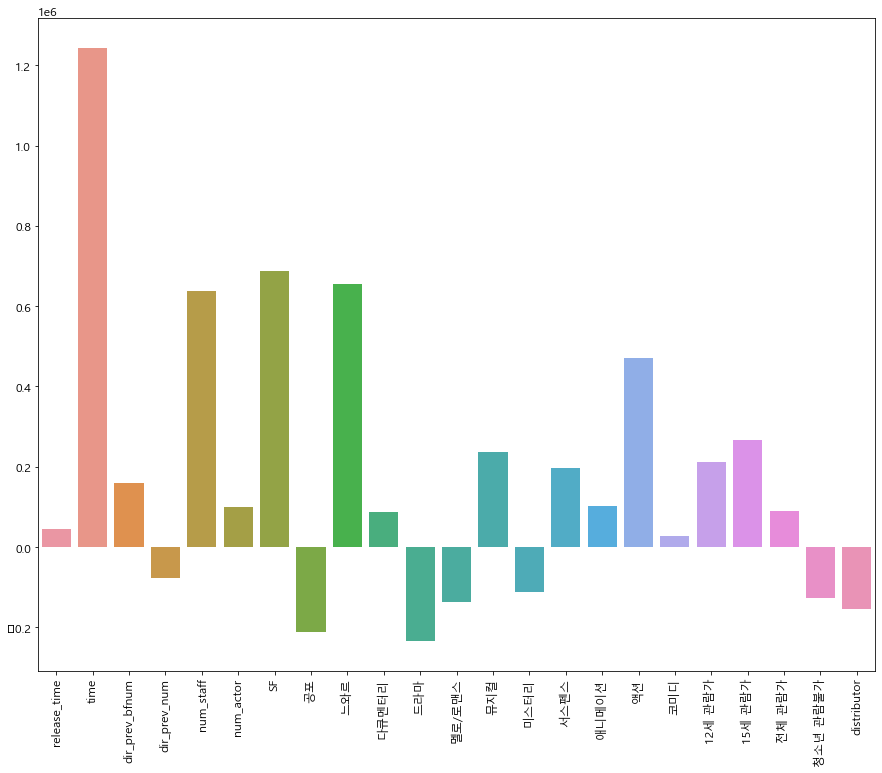

In [67]:
plt.figure(figsize= (15,12))  # 피쳐의 중요도, 가중치 시각화
sns.barplot(x = X_train.columns, y = lasso_model_3.coef_)
plt.xticks(rotation = 90)
plt.show()

In [68]:
lasso_3_predicted = lasso_model_3.predict(X_test) # Lasso 모델 예측

In [69]:
#lasso model 평가

print(f'r2 score : {r2_score(y_test, lasso_3_predicted)}')
print(f'RMSE : {np.sqrt(mean_squared_error(y_test, lasso_3_predicted))}')
print(f'MAE : {mean_absolute_error(y_test, lasso_3_predicted)}')

r2 score : 0.050942975819408876
RMSE : 647963.9779183405
MAE : 526302.3823956097


In [70]:
from sklearn.linear_model import Lasso

lasso_model_10 = Lasso(alpha=10000)
lasso_model_10.fit(X_train, y_train)
lasso_model_10.coef_, lasso_model_10.intercept_ # 각 피쳐별 가중치가 작아진 것을 확인할 수 있다.




(array([  31397.38479637, 1032738.27353461,  154294.49029118,
         -50157.52144213,  685873.93977509,   95284.78497576,
         227354.35054638, -123905.71815678,  388041.53816536,
              0.        , -233672.30297731, -109853.48008411,
              0.        ,      -0.        ,       0.        ,
              0.        ,  170924.45637414,      -0.        ,
              0.        ,   69922.26995116,      -0.        ,
        -273781.6700094 , -150546.42927939]),
 1103975.749293789)

In [71]:
lasso_10_predicted = lasso_model_10.predict(X_test)  # Lasso 모델 예측
#lasso model 평가

print(f'r2 score : {r2_score(y_test, lasso_10_predicted)}')
print(f'RMSE : {np.sqrt(mean_squared_error(y_test, lasso_10_predicted))}')
print(f'MAE : {mean_absolute_error(y_test, lasso_10_predicted)}')

r2 score : 0.21163132760131687
RMSE : 590567.289060576
MAE : 469655.7187267617


C:\Users\yoon9\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\yoon9\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


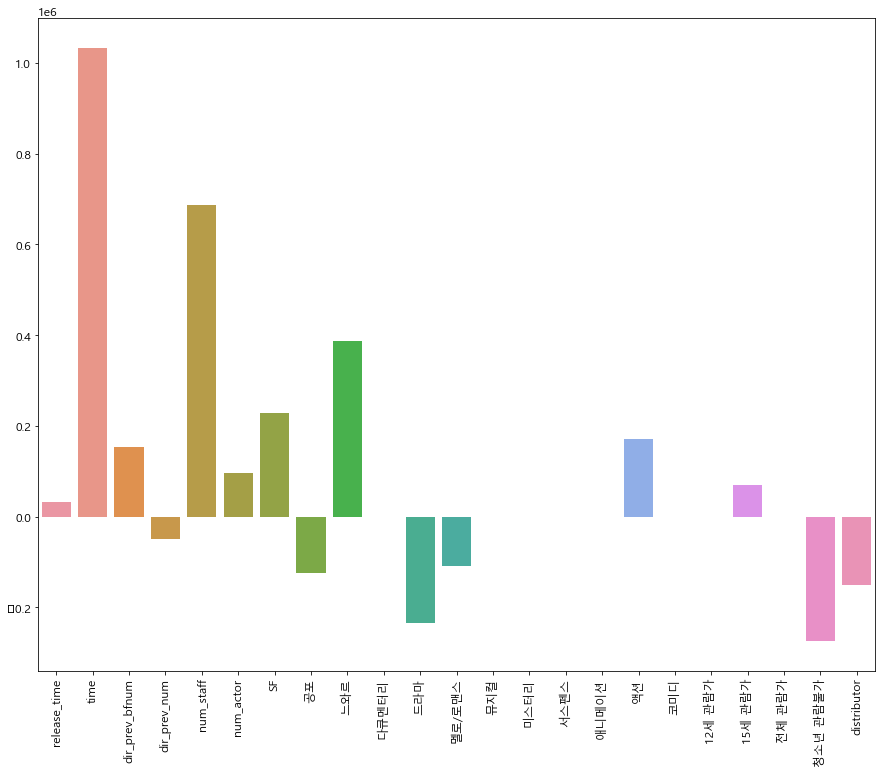

In [72]:
plt.figure(figsize=(15, 12))  # 피쳐의 중요도, 가중치 시각화
sns.barplot(x=X_train.columns, y=lasso_model_10.coef_)
plt.xticks(rotation=90)
plt.show()

모델 평가 결과 : Lasso model 과 Linear model이 성능 차이가 많이 나지 않는 이유
추측 1 : 데이터 프레임의 피쳐가 많지 않기 가중치에 차이가 있어도 전반적인 선형 모델은 같다.
추측 2 : 결국 Lasso 과 다중 선형 회귀 모델은 같은 선형 회귀 모델이고 거기에 Lasso 는 제약이 있는 모델인데
        Lasso 알고리즘에 걸리는 제약이 많지 않아서 결과가 같은 것 같습니다. --> 그래서 alpha 이 켜질 경우 성능이 좋아지는 것을 확인할 수 있습니다..

## 결과물 제출

In [73]:
submission = pd.read_csv('C:/Users/yoon9/PycharmProjects/Sejong_Project/AI Class/Data/Movie Data/submission(2).csv')

In [74]:
test_predict = lasso_model_10.predict(test)

In [75]:
test

,release_time,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,SF,공포,느와르,다큐멘터리,...,미스터리,서스펜스,애니메이션,액션,코미디,12세 관람가,15세 관람가,전체 관람가,청소년 관람불가,distributor
600,-1.741142,0.315688,-0.123280,0.952435,0.913702,-0.272039,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0
601,-1.741142,0.139989,-0.088409,2.637436,0.737661,-0.272039,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
602,-1.741142,0.169273,3.106604,1.794936,1.611794,1.426694,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
603,-1.448580,0.183914,0.199878,0.952435,1.545020,-0.696722,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
604,-1.448580,0.096065,-0.345539,0.109935,1.375050,-1.121406,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
838,1.184476,-0.372466,-0.369641,0.109935,-0.907408,0.152644,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0
839,0.891914,-0.255333,-0.371783,-0.732566,-0.822423,-0.696722,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
840,0.891914,0.052140,-0.371783,-0.732566,0.428073,0.152644,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0
841,0.891914,-0.021068,-0.329861,0.109935,-0.518905,1.426694,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0


In [76]:
submission['box_off_num'] = test_predict

In [77]:
submission

,title,box_off_num
0,용서는 없다,1.722469e+06
1,아빠가 여자를 좋아해,1.418121e+06
2,하모니,2.621183e+06
3,의형제,2.465646e+06
4,평행 이론,1.881150e+06
...,...,...
238,해에게서 소년에게,-5.292545e+05
239,울보 권투부,2.172011e+05
240,어떤살인,1.135975e+06
241,말하지 못한 비밀,-1.252422e+05


In [78]:
submission.to_csv('C:/Users/yoon9/Desktop/3-2/인공지능/17011733_윤지환_Assignment1_submission.csv',index = False,encoding = 'cp949')